DATA

In [3]:
!pip install ucimlrepo

In [4]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
from typing import Tuple

X = None
y = None
feature_names = None
target_name = None

def load_iris_data() -> Tuple[np.ndarray, np.ndarray, list, str]:

    global X, y, feature_names, target_name

    iris = fetch_ucirepo(id=53)

    X_df = iris.data.features
    y_df = iris.data.targets

    feature_names = X_df.columns.tolist()
    target_name = y_df.columns[0]

    target_col = y_df.columns[0]
    y_df[target_col] = y_df[target_col].str.replace('Iris-', '')

    X = X_df.values
    y = y_df.values.flatten()

    print("Iris Data Loaded and Preprocessed.")
    return X, y, feature_names, target_name


def load_wine_data() -> Tuple[np.ndarray, np.ndarray]:

    wine = fetch_ucirepo(id=109)

    X_df = wine.data.features
    y_df = wine.data.targets

    X_wine = X_df.values
    y_wine = y_df.values.flatten()

    print("Wine Data Loaded.")
    return X_wine, y_wine

if __name__ == '__main__':
    X_iris, y_iris, _, _ = load_iris_data()
    print(f"\nIris Features (X) shape: {X_iris.shape}")
    print(f"Iris Labels (y) shape: {y_iris.shape}")
    print(f"First 5 Iris features:\n{X_iris[:5]}")
    print(f"First 5 Iris labels: {y_iris[:5]}")

    X_wine, y_wine = load_wine_data()
    print(f"\nWine Features (X) shape: {X_wine.shape}")
    print(f"Wine Labels (y) shape: {y_wine.shape}")

/tmp/ipython-input-170777204.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df[target_col] = y_df[target_col].str.replace('Iris-', '')


Iris Data Loaded and Preprocessed.

Iris Features (X) shape: (150, 4)
Iris Labels (y) shape: (150,)
First 5 Iris features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 Iris labels: ['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
Wine Data Loaded.

Wine Features (X) shape: (178, 13)
Wine Labels (y) shape: (178,)


EDA

/tmp/ipython-input-170777204.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df[target_col] = y_df[target_col].str.replace('Iris-', '')


Iris Data Loaded and Preprocessed.


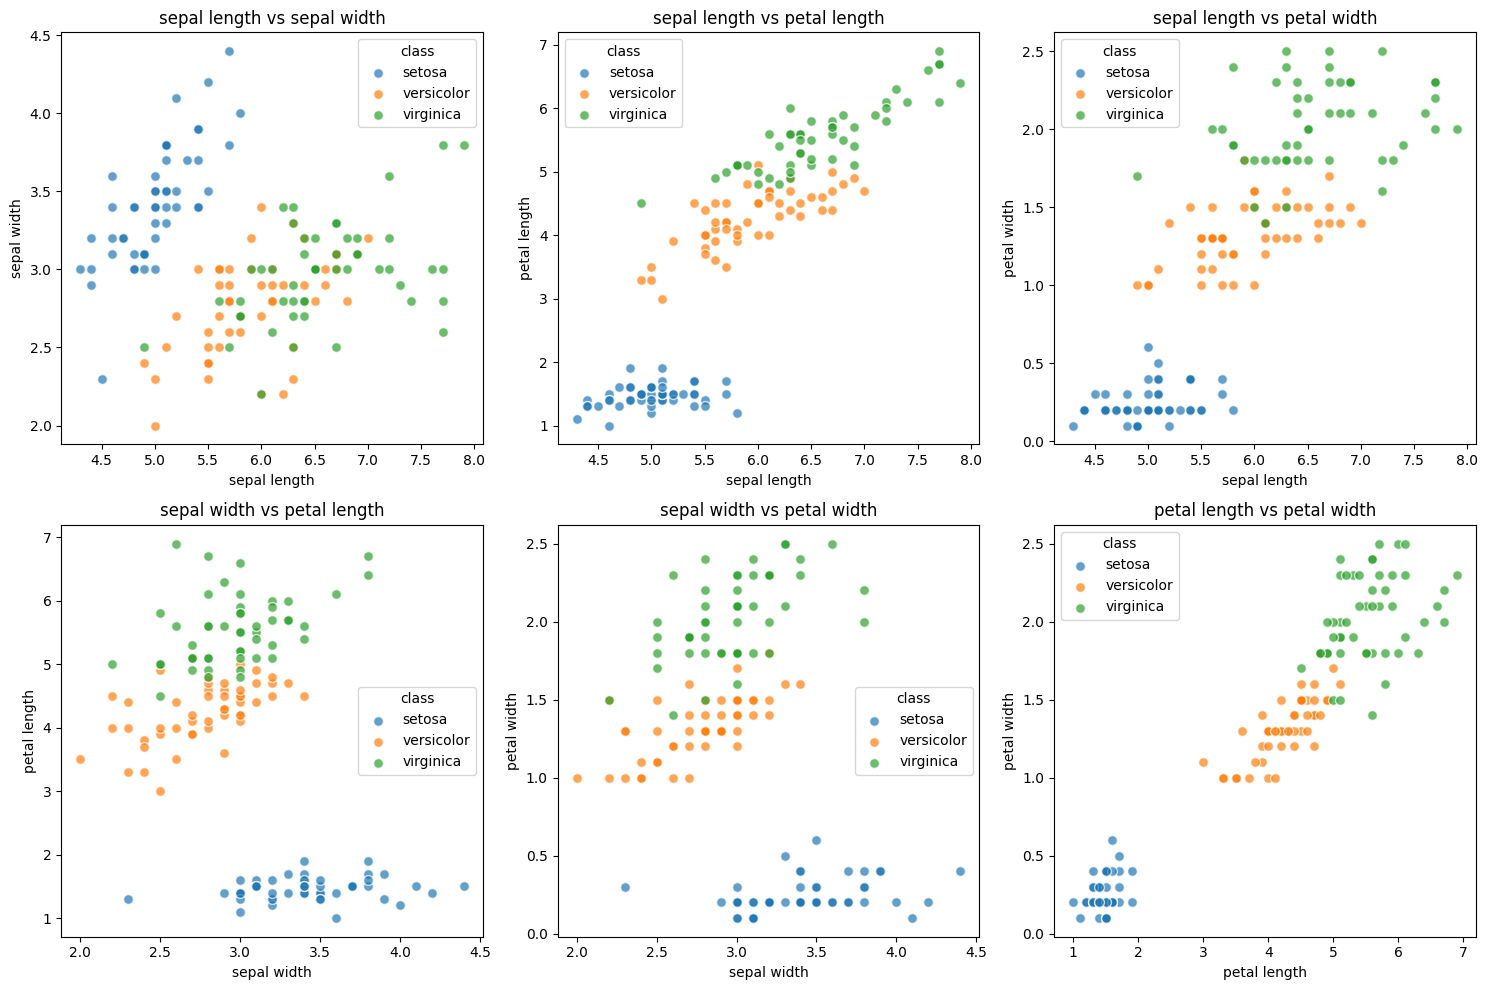

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from typing import List, Any

def plot_iris_eda():

    # Access the globally defined function from the data loading cell
    X, y, feature_names, target_name = load_iris_data()

    species = np.unique(y)
    n_features = X.shape[1]

    feature_pairs = list(itertools.combinations(range(n_features), 2))
    n_plots = len(feature_pairs)

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, (f1_idx, f2_idx) in enumerate(feature_pairs):
        ax = axes[i]

        for s in species:
            X_species = X[y == s]

            ax.scatter(
                X_species[:, f1_idx],
                X_species[:, f2_idx],
                label=s,
                alpha=0.7,
                edgecolors='w',
                s=50
            )

        f1_name = feature_names[f1_idx]
        f2_name = feature_names[f2_idx]

        ax.set_xlabel(f1_name)
        ax.set_ylabel(f2_name)
        ax.set_title(f'{f1_name} vs {f2_name}')
        ax.legend(title=target_name)

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    plot_iris_eda()

UTILS

In [6]:
import numpy as np
from typing import Tuple

def train_test_split(X: np.ndarray, y: np.ndarray, test_size: float = 0.2, random_state: int = None) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:

    if random_state is not None:
        np.random.seed(random_state)

    n_samples = X.shape[0]
    n_test = int(n_samples * test_size)

    shuffled_indices = np.random.permutation(n_samples)

    test_indices = shuffled_indices[:n_test]
    train_indices = shuffled_indices[n_test:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

if __name__ == '__main__':
    X_dummy = np.arange(10).reshape(10, 1)
    y_dummy = np.array(['a', 'a', 'b', 'b', 'c', 'c', 'a', 'b', 'c', 'a'])

    X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_dummy, test_size=0.3, random_state=42)

    print("--- Train-Test Split Test (30% test size, seed 42) ---")
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
    print(f"X_train (first 5): {X_train.flatten()[:5]}")
    print(f"X_test: {X_test.flatten()}")

--- Train-Test Split Test (30% test size, seed 42) ---
X_train shape: (7, 1), X_test shape: (3, 1)
y_train shape: (7,), y_test shape: (3,)
X_train (first 5): [0 7 2 9 4]
X_test: [8 1 5]


CLASSIFIER

In [7]:
import numpy as np
from collections import Counter
from typing import Any, List, Union

def euclidean_distance(x1: np.ndarray, x2: np.ndarray) -> float:

    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNNClassifier:

    def __init__(self, k: int = 3):

        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train: np.ndarray, y_train: np.ndarray):

        self.X_train = X_train
        self.y_train = y_train

    def _predict(self, x: np.ndarray) -> Any:
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = self.y_train[k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)

        return most_common[0][0]

    def predict(self, X_test: np.ndarray) -> np.ndarray:

        predictions: List[Any] = [self._predict(x) for x in X_test]

        return np.array(predictions)

if __name__ == '__main__':
    X_train_dummy = np.array([[1, 1], [1, 2], [2, 2], [5, 5]])
    y_train_dummy = np.array(['A', 'A', 'B', 'B'])
    X_test_dummy = np.array([[1.5, 1.5], [6, 6]])

    # Test k=1
    knn_1 = KNNClassifier(k=1)
    knn_1.fit(X_train_dummy, y_train_dummy)
    preds_1 = knn_1.predict(X_test_dummy)
    print(f"k=1 Predictions: {preds_1} (Expected: ['A', 'B'])")

    # Test k=3
    knn_3 = KNNClassifier(k=3)
    knn_3.fit(X_train_dummy, y_train_dummy)
    preds_3 = knn_3.predict(X_test_dummy)
    print(f"k=3 Predictions: {preds_3} (Expected: ['A', 'B'])")

k=1 Predictions: ['A' 'B'] (Expected: ['A', 'B'])
k=3 Predictions: ['A' 'B'] (Expected: ['A', 'B'])


/tmp/ipython-input-170777204.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df[target_col] = y_df[target_col].str.replace('Iris-', '')


Iris Data Loaded and Preprocessed.
Wine Data Loaded.

Initial Evaluation: Iris Dataset (k=3)

Running Evaluation on Iris (Initial, k=3) Dataset (k=3)]
Total Test Samples: 30
Accuracy: 1.0000


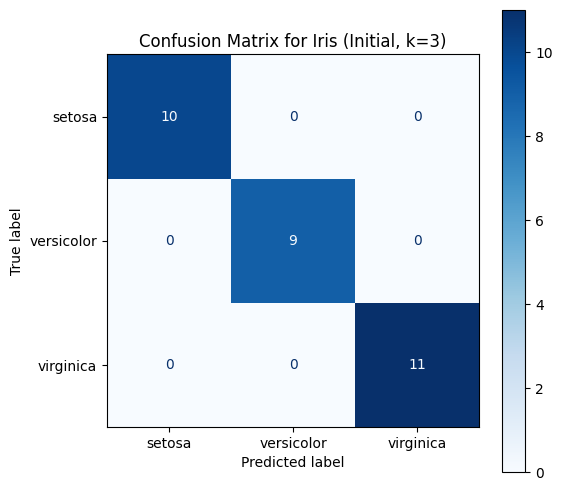

Hyperparameter Tuning: Accuracy vs. k-value

Running Evaluation on Iris (Tuning, k=1) Dataset (k=1)]
Total Test Samples: 30
Accuracy: 1.0000


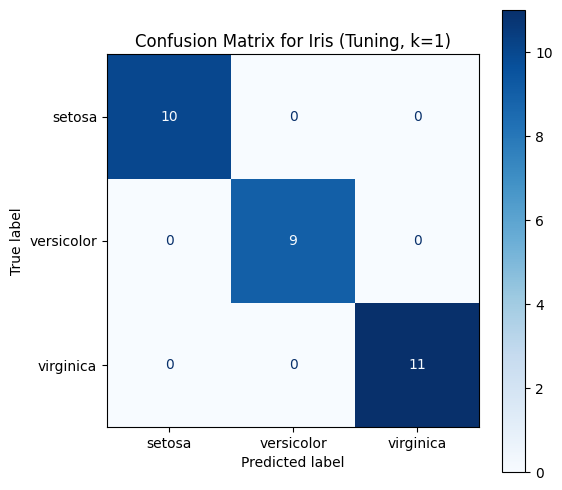


Running Evaluation on Iris (Tuning, k=3) Dataset (k=3)]
Total Test Samples: 30
Accuracy: 1.0000


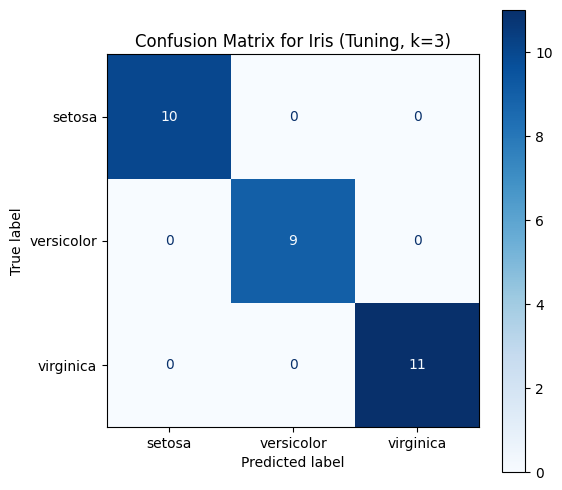


Running Evaluation on Iris (Tuning, k=5) Dataset (k=5)]
Total Test Samples: 30
Accuracy: 1.0000


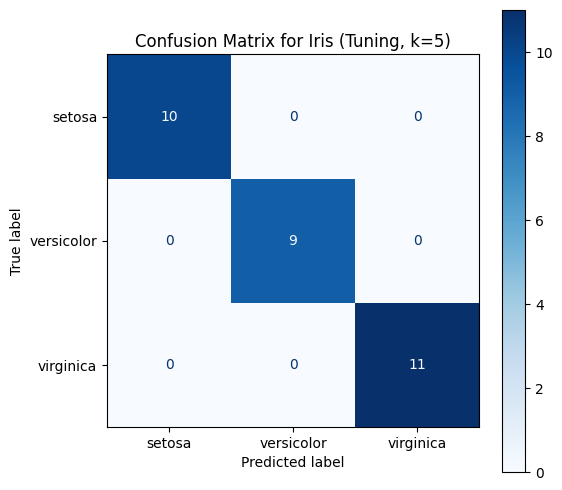


Running Evaluation on Iris (Tuning, k=7) Dataset (k=7)]
Total Test Samples: 30
Accuracy: 0.9667


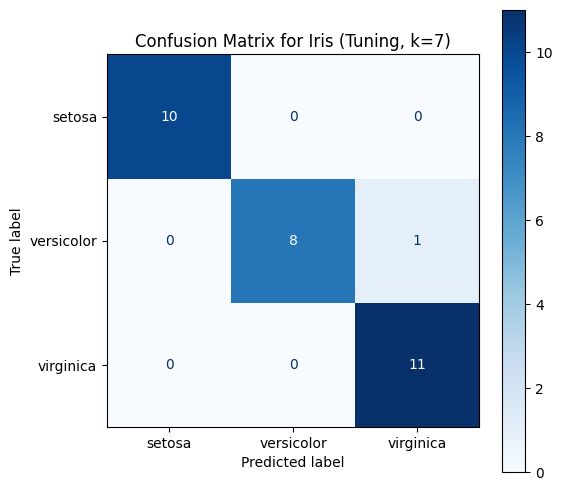


Running Evaluation on Iris (Tuning, k=9) Dataset (k=9)]
Total Test Samples: 30
Accuracy: 1.0000


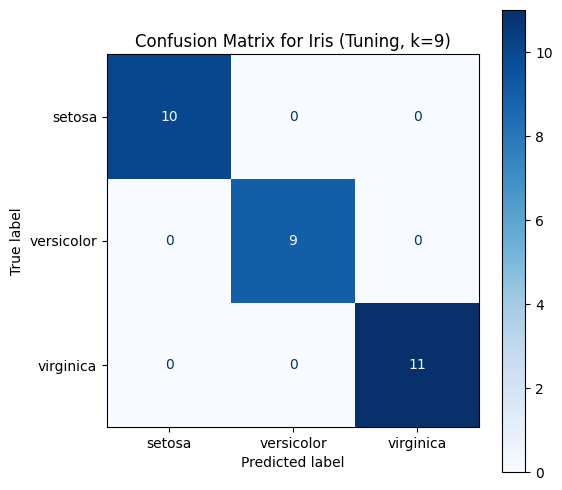


Running Evaluation on Iris (Tuning, k=11) Dataset (k=11)]
Total Test Samples: 30
Accuracy: 1.0000


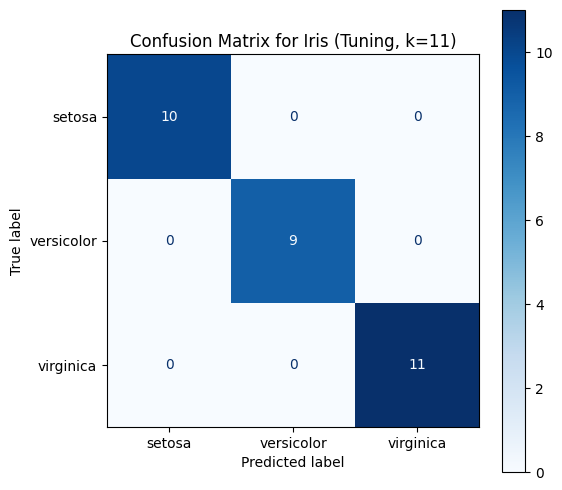


Running Evaluation on Iris (Tuning, k=15) Dataset (k=15)]
Total Test Samples: 30
Accuracy: 1.0000


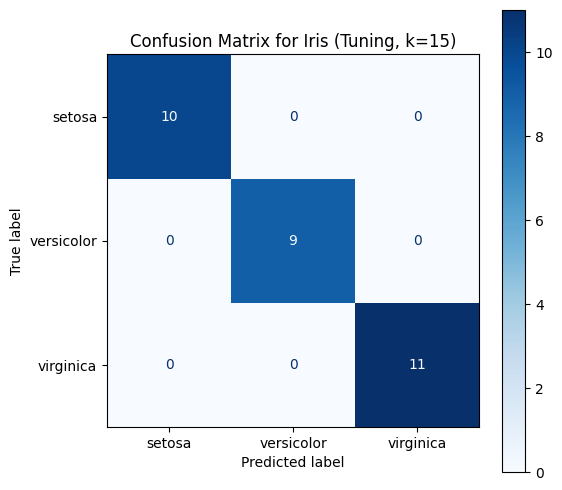

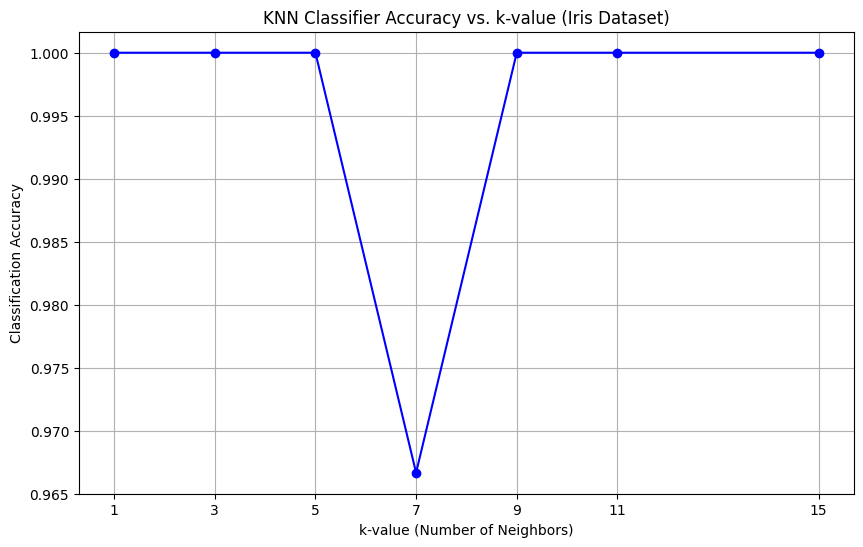


Analysis:
Best k-value identified: k=1 with an accuracy of 1.0000

Running Evaluation on Wine (Generalization, k=1) Dataset (k=1)]
Total Test Samples: 35
Accuracy: 0.7714


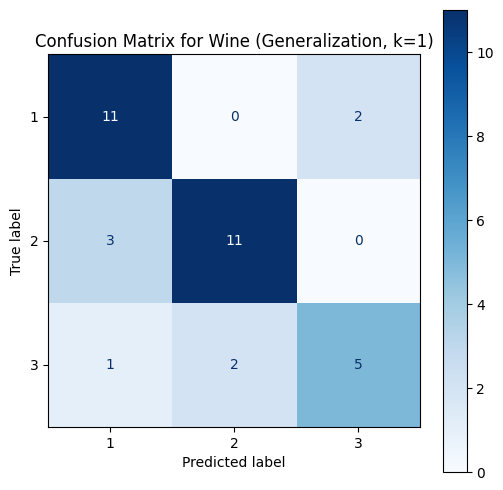


Final Wine Dataset Accuracy (with best k=1): 0.7714


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Any
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo # Import fetch_ucirepo

# Import the data loading functions from the previous cell
from __main__ import load_iris_data, load_wine_data, train_test_split, KNNClassifier


def calculate_accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    return correct_predictions / total_predictions

def plot_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray, title: str):
    labels = np.unique(np.concatenate((y_true, y_pred)))

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap=plt.cm.Blues, ax=ax)

    ax.set_title(f'Confusion Matrix for {title}')
    plt.show()

def run_evaluation_pipeline(X: np.ndarray, y: np.ndarray, title: str, k_value: int = 3, random_state: int = 42, plot_cm: bool = False) -> float:

    print(f"\nRunning Evaluation on {title} Dataset (k={k_value})]")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    knn = KNNClassifier(k=k_value)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = calculate_accuracy(y_test, y_pred)

    print(f"Total Test Samples: {len(y_test)}")
    print(f"Accuracy: {accuracy:.4f}")

    if plot_cm:
        plot_confusion_matrix(y_test, y_pred, title)

    return accuracy

def hyperparameter_tuning_and_analysis(X: np.ndarray, y: np.ndarray) -> Tuple[int, float]:
    k_values: List[int] = [1, 3, 5, 7, 9, 11, 15]
    accuracies: List[float] = []

    print("Hyperparameter Tuning: Accuracy vs. k-value")

    for k in k_values:
        acc = run_evaluation_pipeline(X, y, f"Iris (Tuning, k={k})", k_value=k, plot_cm=True)
        accuracies.append(acc)

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')

    plt.title('KNN Classifier Accuracy vs. k-value (Iris Dataset)')
    plt.xlabel('k-value (Number of Neighbors)')
    plt.ylabel('Classification Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_k_index = np.argmax(accuracies)
    best_k = k_values[best_k_index]
    best_accuracy = accuracies[best_k_index]

    print(f"\nAnalysis:")
    print(f"Best k-value identified: k={best_k} with an accuracy of {best_accuracy:.4f}")

    return best_k, best_accuracy

if __name__ == '__main__':
    # Load the data
    X_iris, y_iris, _, _ = load_iris_data()
    X_wine, y_wine = load_wine_data()

    print("\nInitial Evaluation: Iris Dataset (k=3)")
    accuracy_k3 = run_evaluation_pipeline(X_iris, y_iris, "Iris (Initial, k=3)", k_value=3, plot_cm=True)

    best_k, _ = hyperparameter_tuning_and_analysis(X_iris, y_iris)

    accuracy_wine = run_evaluation_pipeline(X_wine, y_wine, f"Wine (Generalization, k={best_k})", k_value=best_k, plot_cm=True)

    print(f"\nFinal Wine Dataset Accuracy (with best k={best_k}): {accuracy_wine:.4f}")